In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df_stocks = pd.read_csv('data/stocks.csv')
df_tweets = pd.read_csv('data/TrumpTweets.csv',index_col=0)
df_approval_ratign = pd.read_csv('data/TrumpApproval.csv')

In [4]:
df_approval_ratign.shape

(962, 4)

In [5]:
df_approval_ratign.head()

,Unnamed: 0,approve_estimate,disapprove_estimate,timestamp
0,0,42.81609,53.54470,2019-09-11
1,3,42.54695,53.41855,2019-09-10
2,8,42.62912,53.25327,2019-09-09
3,9,42.59635,53.27431,2019-09-08
4,12,42.64939,53.15034,2019-09-07


In [6]:
df_tweets.max(axis=0)

count                        35.0
avg_favorites_per_day    320104.0
dtype: float64

In [7]:
df_stocks['1. open'] = df_stocks['1. open'].astype(float)
df_stocks['2. high'] = df_stocks['2. high'].astype(float)
df_stocks['3. low'] = df_stocks['3. low'].astype(float)
df_stocks['4. close'] = df_stocks['4. close'].astype(float)
df_stocks['5. adjusted close'] = df_stocks['5. adjusted close'].astype(float)
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
Unnamed: 0           502 non-null object
1. open              502 non-null float64
2. high              502 non-null float64
3. low               502 non-null float64
4. close             502 non-null float64
5. adjusted close    502 non-null float64
dtypes: float64(5), object(1)
memory usage: 23.7+ KB


In [8]:
df_stocks['delta']=((df_stocks['5. adjusted close']-df_stocks['1. open'])/df_stocks['1. open'])*100

In [9]:
mean_tweets = df_tweets['count'].mean()
a = df_tweets[df_tweets['count']<8]
b = df_tweets[df_tweets['count']>=8]

In [10]:
c = df_stocks[df_stocks.index.isin(a.index)]
d = df_stocks[df_stocks.index.isin(b.index)]
stats.ttest_ind(c['delta'],d['delta'], equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [11]:
c.mean()

Unnamed: 0          NaN
1. open             NaN
2. high             NaN
3. low              NaN
4. close            NaN
5. adjusted close   NaN
delta               NaN
dtype: float64

In [12]:
print(c['delta'].mean())
print(d['delta'].mean())

nan
nan


In [13]:
df_tweets['count'].corr(df_stocks['delta'])

nan

In [14]:
df_tweets['count'].corr(df_approval_ratign['approve_estimate'])

nan

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2017-01-01 to 2018-12-31
Data columns (total 2 columns):
count                    716 non-null int64
avg_favorites_per_day    716 non-null float64
dtypes: float64(1), int64(1)
memory usage: 16.8+ KB


In [17]:
df_stocks['Unnamed: 0'] = pd.to_datetime(df_stocks['Unnamed: 0'])

In [18]:
df_stocks.set_index('Unnamed: 0',inplace=True)

In [19]:
df_tweets.index

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='date', length=716)

In [20]:
temp_df = pd.merge(df_stocks,df_tweets,left_index=True,right_index=True)

In [21]:
temp_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,delta,count,avg_favorites_per_day
2018-12-31,229.31,229.97,227.45,229.81,227.3423,-0.858096,12,91428.416667
2018-12-28,229.32,231.07,226.52,227.76,225.3143,-1.746773,5,129411.800000
2018-12-27,222.96,228.12,219.60,228.05,225.6012,1.184607,12,109374.666667
2018-12-26,216.88,226.10,214.83,225.95,223.5237,3.063307,1,222929.000000
2018-12-24,219.74,220.80,215.07,215.07,212.7606,-3.176208,18,110681.333333


In [22]:
df_approval_ratign.drop_duplicates('timestamp',inplace=True)

In [23]:
df = temp_df.join(df_approval_ratign.set_index('timestamp'), how='left')

In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
df.to_csv('final.csv')

In [26]:
df = df.loc[~df.index.duplicated(keep='first')]

In [27]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,delta,count,avg_favorites_per_day,approve_estimate,disapprove_estimate
2018-12-31,229.31,229.97,227.45,229.81,227.3423,-0.858096,12,91428.416667,42.56866,53.09455
2018-12-28,229.32,231.07,226.52,227.76,225.3143,-1.746773,5,129411.800000,42.49585,52.94865
2018-12-27,222.96,228.12,219.60,228.05,225.6012,1.184607,12,109374.666667,42.52130,52.92836
2018-12-26,216.88,226.10,214.83,225.95,223.5237,3.063307,1,222929.000000,42.50584,52.97219
2018-12-24,219.74,220.80,215.07,215.07,212.7606,-3.176208,18,110681.333333,43.04998,52.42950


In [28]:
df.avg_favorites_per_day.mean()

78921.61319064228

In [29]:
df.rename(columns={'5. adjusted close':'Adjusted Closing Price','count':'Tweet Count'}, inplace = True)

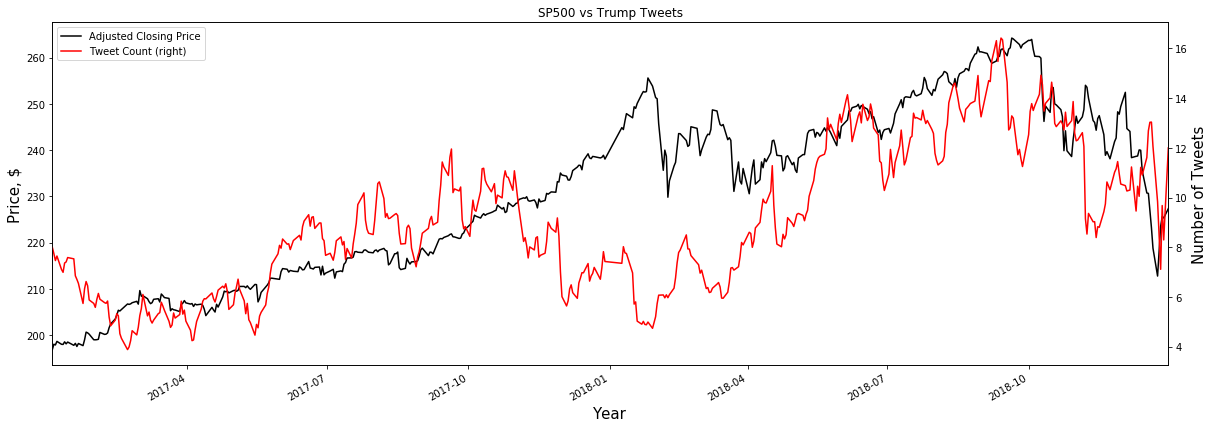

In [30]:
plt.figure()
                       
ax = df['Adjusted Closing Price'].plot(figsize=(20,7),color='black', legend=True, title='SP500 vs Trump Tweets')
bx = df['Tweet Count'].ewm(com=8).mean().plot(secondary_y=True,color='red', legend=True)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Price, $',fontsize=15)
bx.set_ylabel('Number of Tweets',fontsize=15)
plt.show()


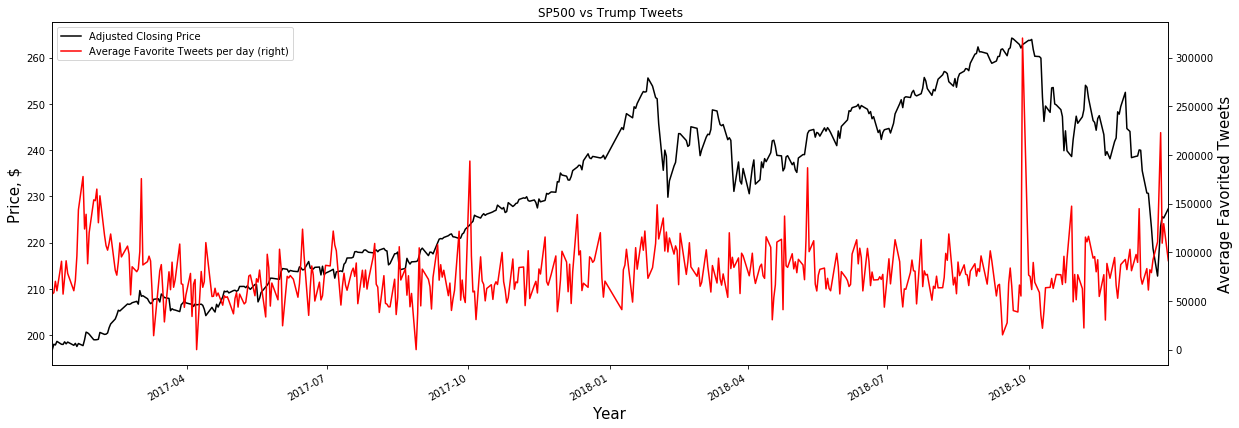

In [31]:
plt.figure()
                       
ax1 = df['Adjusted Closing Price'].plot(figsize=(20,7),color='black', legend=True, title='SP500 vs Trump Tweets')
bx1 = df['avg_favorites_per_day'].plot(secondary_y=True,color='red', legend=True, label='Average Favorite Tweets per day')
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Price, $',fontsize=15)
bx1.set_ylabel('Average Favorited Tweets', fontsize=15)
plt.show()


In [32]:
from scipy import stats

In [35]:
stats.ttest_ind(df['Adjusted Closing Price'],df['Tweet Count'])

Ttest_indResult(statistic=257.16570756526784, pvalue=0.0)

In [36]:
mean_tweets = df['Tweet Count'].mean()
a = df[df['Tweet Count']<10]
b = df[df['Tweet Count']>=20]

In [37]:
print(mean_tweets)

9.066937119675456


In [38]:
c = df[df.index.isin(a.index)]
d = df[df.index.isin(b.index)]
result_stocks = stats.ttest_ind(c['delta'],d['delta'], equal_var = False)

In [39]:
results_rating = stats.ttest_ind(c['approve_estimate'],d['approve_estimate'], equal_var = False)

In [40]:
result_stocks

Ttest_indResult(statistic=-3.30984098995448, pvalue=0.0033224638984565634)

In [41]:
results_rating

Ttest_indResult(statistic=nan, pvalue=nan)

In [42]:
mean_avg_fav_tweets = df['avg_favorites_per_day'].mean()
# print(mean_avg_fav_tweets)
a = df[df['avg_favorites_per_day']<100]
b = df[df['avg_favorites_per_day']>=200000]

In [43]:
c = df[df.index.isin(a.index)]
d = df[df.index.isin(b.index)]
results_rating_fav = stats.ttest_ind(c['approve_estimate'],d['approve_estimate'], equal_var = False)

In [44]:
results_rating_fav

Ttest_indResult(statistic=-1.8862230883990483, pvalue=0.2758016646437002)

In [45]:
results_rating

Ttest_indResult(statistic=nan, pvalue=nan)

In [46]:
stats.ttest_ind(c['delta'],d['delta'], equal_var = False)

Ttest_indResult(statistic=-2.1657466389911315, pvalue=0.2745904973184992)